In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [7]:
flight_df = pd.read_csv("flights_historical/train_1.csv")

# reformat departure_time
flight_df['departure_time'] = flight_df['departure_time'].apply(str).apply(lambda x: '0'+x if len(x) != 4 else x)

# reformat the dates
flight_df['month'] = flight_df['month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_month'] = flight_df['day_of_month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_week'] = flight_df['day_of_week'].apply(lambda x: x[2:])
# flight_df['day_name'] = flight_df['day_of_week'].apply(lambda x: days_dict[int(x)])
# flight_df['date'] = flight_df['month'] + flight_df['day_of_month'] + flight_df['departure_time']
# flight_df['date'] = pd.to_datetime(flight_df['date'], format = '%m%d%H%M', errors='coerce') 
flight_df['is_delayed'] = flight_df['is_delayed'].astype('category').cat.codes

flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']] = flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']].apply(pd.to_numeric)

flight_df

,unique_carrier,origin,destination,is_delayed,departure_time,month,day_of_month,day_of_week,distance
0,RQ,ULX,TVQ,0,1143,12,16,5,1587
1,C6,URX,DIE,0,2356,3,22,3,2454
2,WT,HSR,VWP,1,2012,1,14,5,1437
3,NB,UGR,CNY,0,1626,10,14,6,328
4,WT,HTE,RJB,0,1112,5,18,3,957
...,...,...,...,...,...,...,...,...,...
89995,WP,ULQ,MQV,0,2056,6,20,1,448
89996,OZ,FSS,QFT,0,630,12,16,6,618
89997,AG,FPH,MQV,0,1525,1,31,2,83
89998,JG,TVQ,TCA,0,1310,12,6,2,146


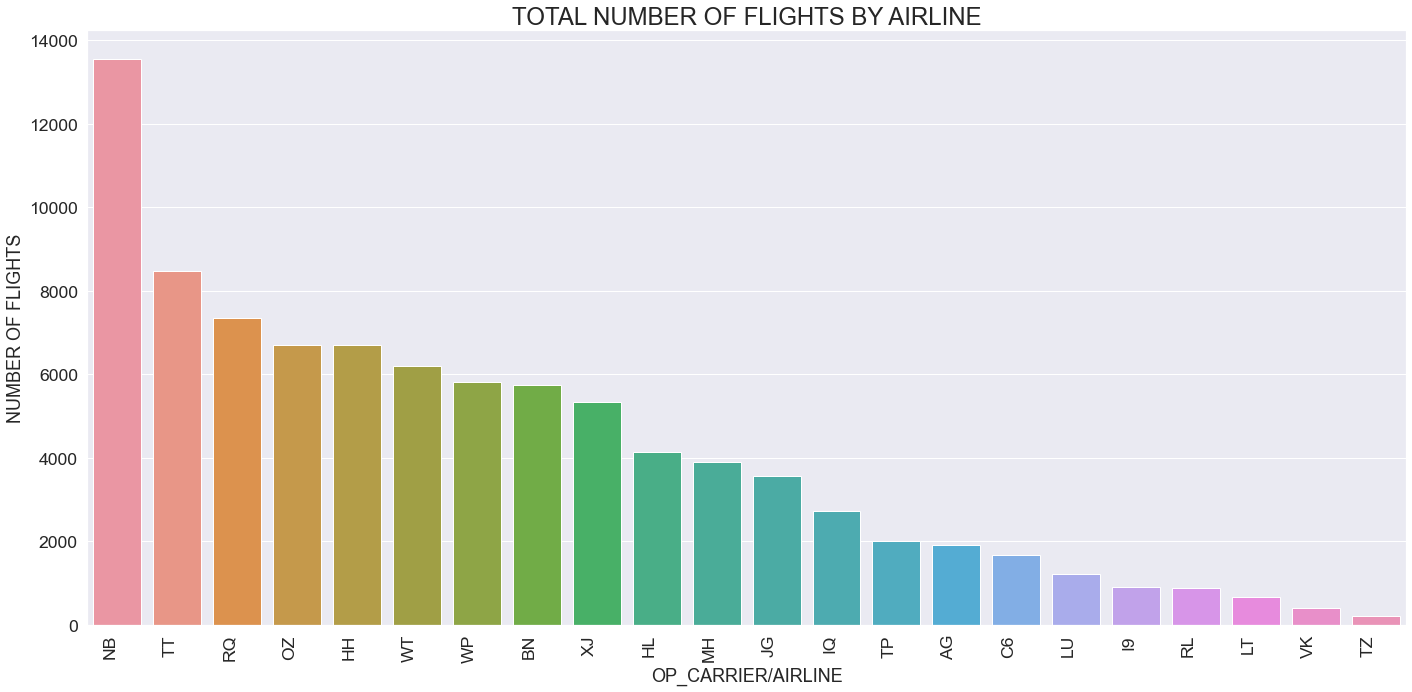

In [8]:
df1 = flight_df.copy()

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['unique_carrier'], data=df1, order=df1['unique_carrier'].value_counts().index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

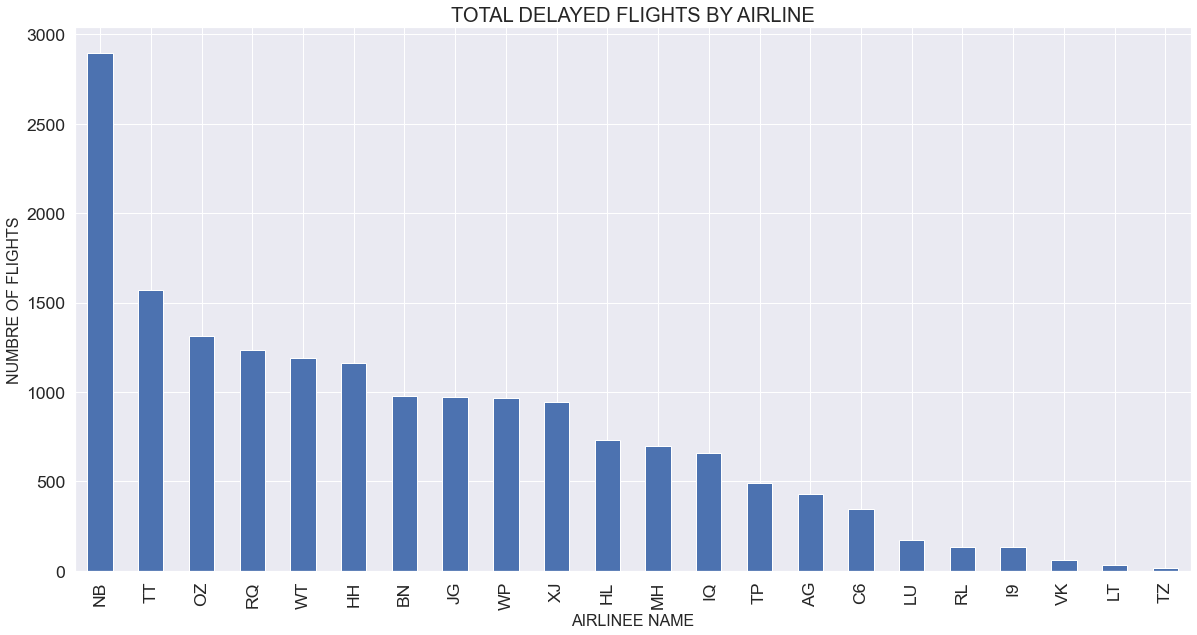

In [9]:
plt.figure(figsize=(20, 10))
df1.groupby('unique_carrier').is_delayed.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [10]:
df1.is_delayed.value_counts(normalize=True)

0    0.809556
1    0.190444
Name: is_delayed, dtype: float64

In [12]:
# delay percentage
df_delay_percent = df1[['unique_carrier', 'is_delayed']]
df_delay_percent.is_delayed.value_counts()

0    72860
1    17140
Name: is_delayed, dtype: int64

In [21]:
temp_df1 = df_delay_percent.groupby(['unique_carrier']).sum().reset_index()
temp_df2 = df1.unique_carrier.value_counts().rename_axis('unique_carrier').reset_index(name='total_flights')

temp_merge = pd.merge(temp_df1, temp_df2, on = 'unique_carrier')
temp_merge['delay_percentage'] = round((temp_merge['is_delayed']*100)/temp_merge['total_flights'],2)

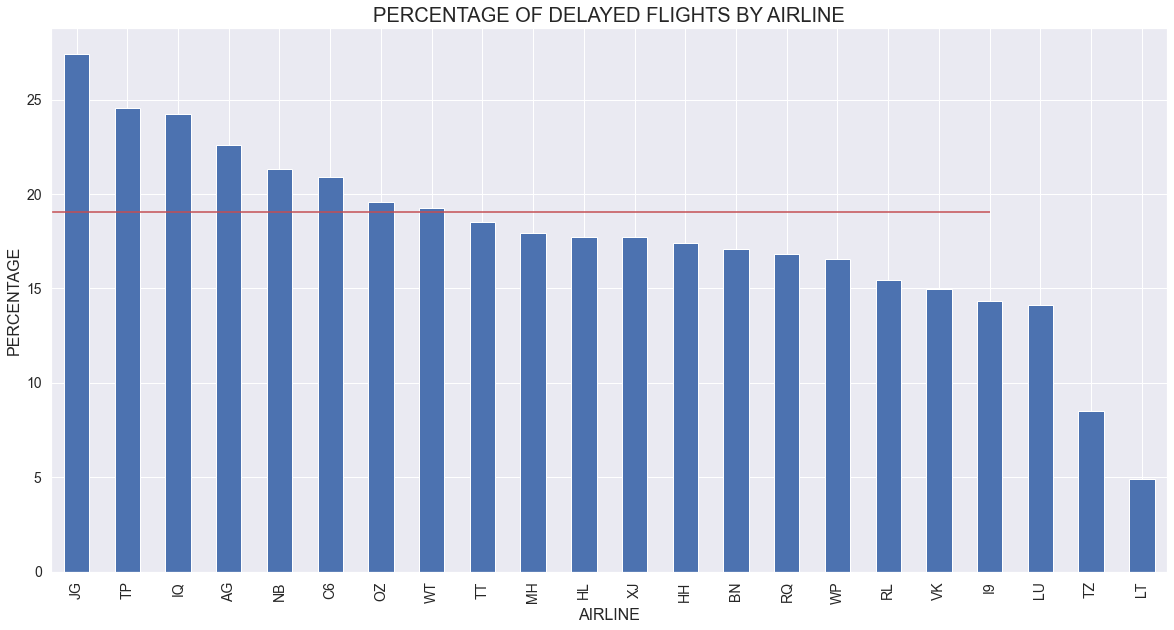

In [22]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
temp_merge.groupby('unique_carrier').delay_percentage.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=19.04, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

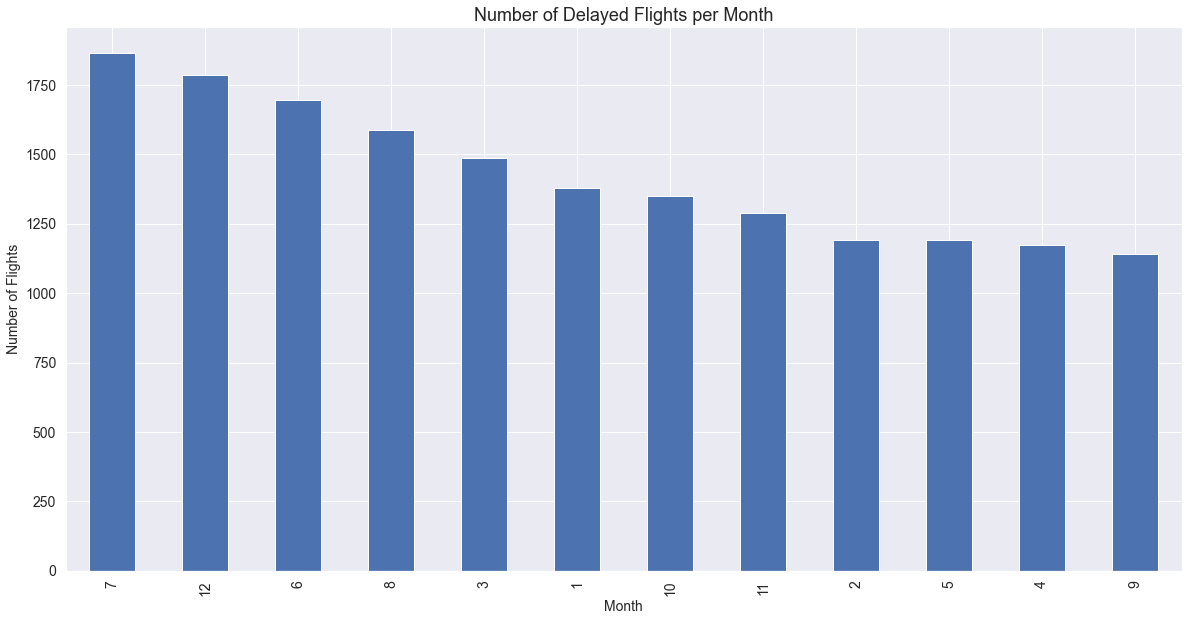

In [23]:
plt.figure(figsize=(20, 10))
df1.groupby('month').is_delayed.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

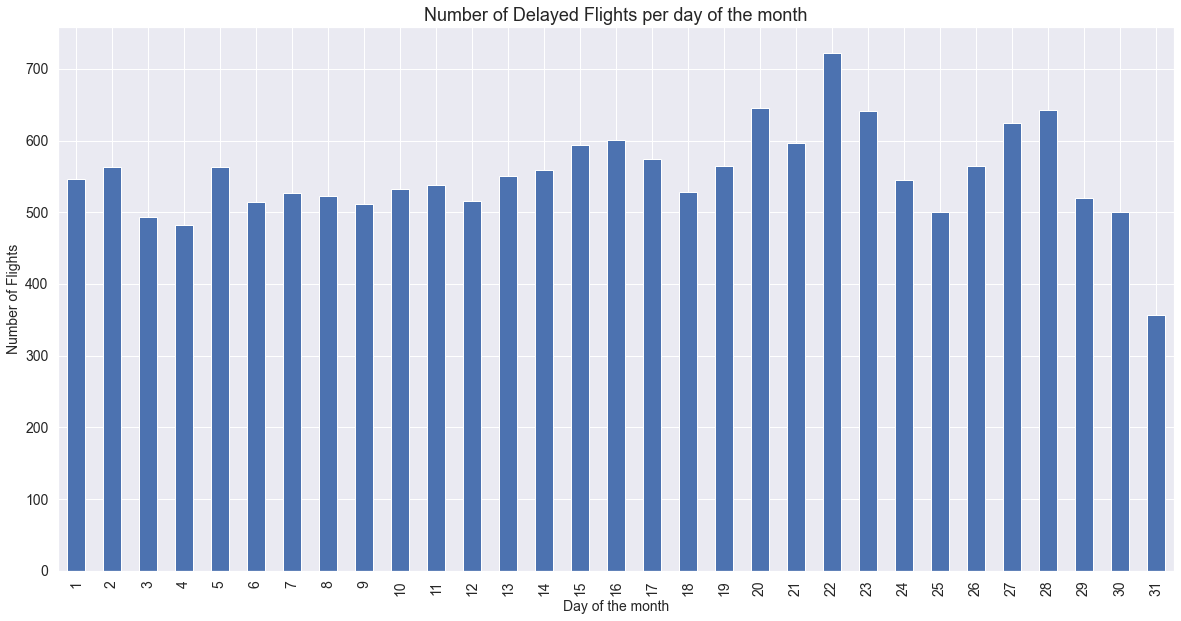

In [26]:
plt.figure(figsize=(20, 10))
df1.groupby('day_of_month').is_delayed.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

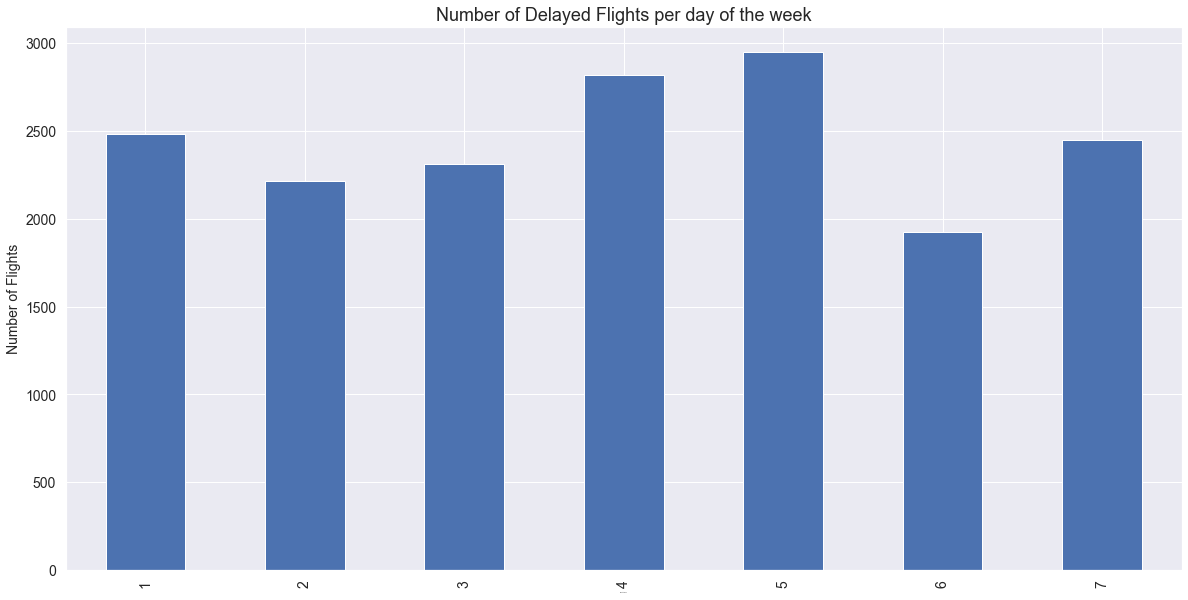

In [29]:
plt.figure(figsize=(20, 10))
df1.groupby('day_of_week').is_delayed.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the week', fontsize=18)
plt.xlabel('Day of the week', fontsize=1)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

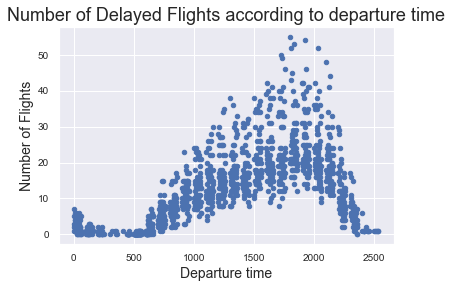

In [86]:
plt.figure(figsize=(20,10))
df1.groupby('departure_time').is_delayed.sum().reset_index().plot.scatter(x='departure_time', y='is_delayed')
plt.title('Number of Delayed Flights according to departure time', fontsize=18)
plt.xlabel('Departure time', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

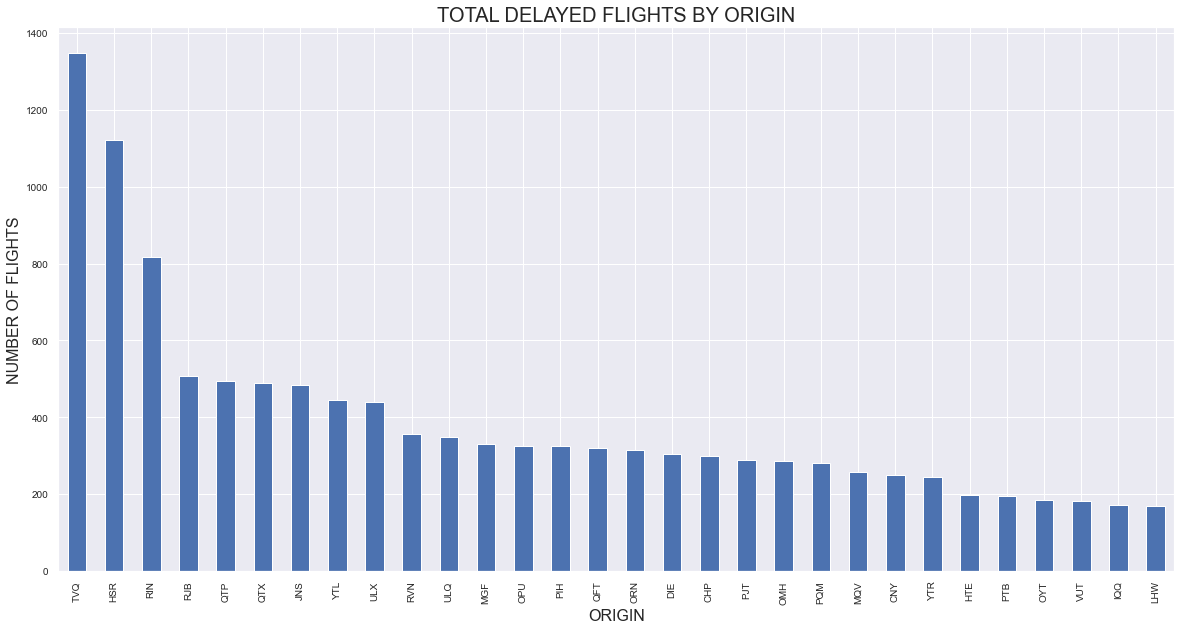

In [83]:
plt.figure(figsize=(20, 10))
df1.groupby('origin').is_delayed.sum().sort_values(ascending=False).head(30).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY ORIGIN', fontsize=20)
plt.xlabel('ORIGIN', fontsize=16)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

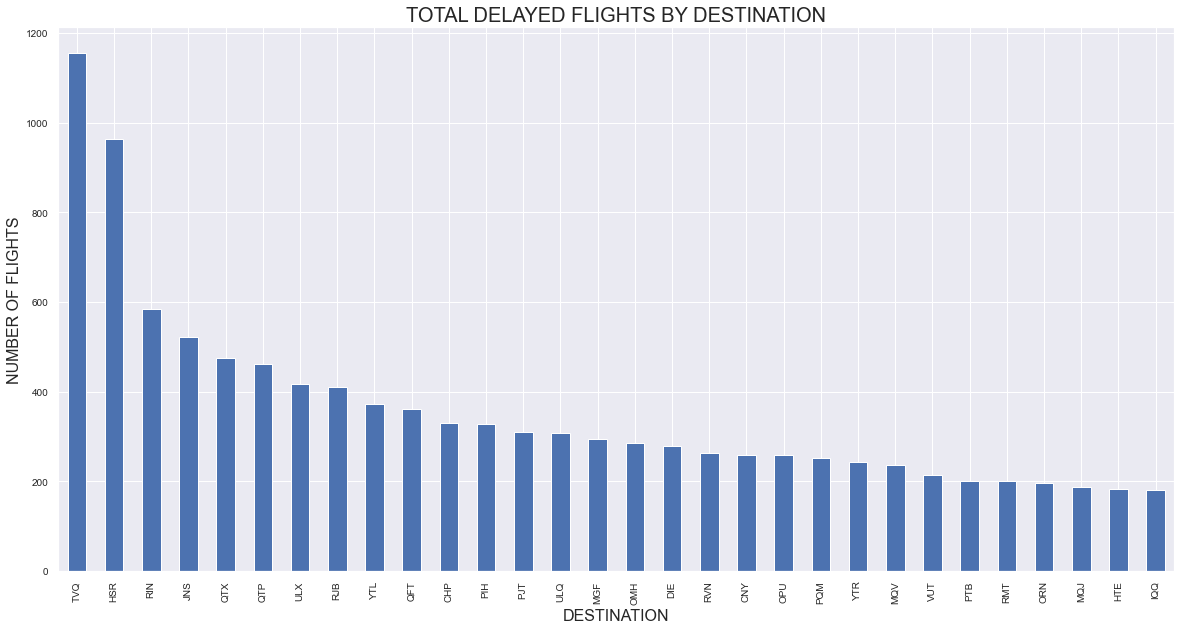

In [84]:
plt.figure(figsize=(20, 10))
df1.groupby('destination').is_delayed.sum().sort_values(ascending=False).head(30).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY DESTINATION', fontsize=20)
plt.xlabel('DESTINATION', fontsize=16)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [90]:
df1.groupby('distance').is_delayed.sum().sort_values(ascending=False).reset_index()

,distance,is_delayed
0,528,82
1,612,81
2,370,80
3,733,79
4,1069,78
...,...,...
1301,1887,0
1302,955,0
1303,2254,0
1304,285,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

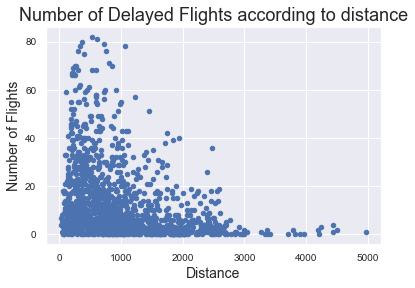

In [88]:
plt.figure(figsize=(20,10))
df1.groupby('distance').is_delayed.sum().reset_index().plot.scatter(x='distance', y='is_delayed')
plt.title('Number of Delayed Flights according to distance', fontsize=18)
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()